# **PROYECTO FINAL - MODULO II - DATA ANALITYCS**

**INTEGRANTES**


*   Christian André Urviola García
*   Diego Frank Lipa Choque
*   Angel Rosendo Condori Coaquira
*   Diego de la Fuente




In [2]:
pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12205 sha256=4cc25a3fabd1ef0c0a609c6937342091b680810a375ce3006b6556bb1fa03d1d
  Stored in directory: /root/.cache/pip/wheels/e9/57/8a/15b864f4d5dc20cef626e3a015fec88b19df385ef30a8364cc
Successfully built empiricaldist


In [3]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


In [4]:
#cargamos el dataset
df=pd.read_excel('DataCovid.xlsx')
df.head()

,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,muestra_rap1,prueba_rap1,resultado_rap1,fecha_res_rap1,secuenciamiento,asintomatico
0,542,2021,5,09-02-2021,PUNO,PUNO,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
1,1234,2020,10,07-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1258,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1266,2020,10,09-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1292,2021,9,05-03-2021,PUNO,PUNO,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,CONFIRMADO,...,SEROLOGIA,NEGATIVO,16-07-2020,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Verificamos los tipos de datos
df.dtypes

id                   int64
ano                  int64
semana               int64
fecha_not           object
diresa              object
                    ...   
prueba_rap1         object
resultado_rap1      object
fecha_res_rap1      object
secuenciamiento    float64
asintomatico        object
Length: 190, dtype: object

In [6]:
#Contamos la cantidad de datos por tipo
df.dtypes.value_counts()

object     119
int64       39
float64     32
dtype: int64

In [7]:
#Tamanño de dataset
df.shape

(95315, 190)

In [8]:
#Verificamos los nullos por filas
df.isnull().any()

id                 False
ano                False
semana             False
fecha_not          False
diresa             False
                   ...  
prueba_rap1         True
resultado_rap1      True
fecha_res_rap1      True
secuenciamiento     True
asintomatico        True
Length: 190, dtype: bool

In [9]:
#Contamos la cantidad de nullos por filas
df.isnull().sum()

id                     0
ano                    0
semana                 0
fecha_not              0
diresa                 0
                   ...  
prueba_rap1        88213
resultado_rap1     88067
fecha_res_rap1     88081
secuenciamiento    95315
asintomatico       56345
Length: 190, dtype: int64

In [10]:
#Totalizamos la cantidad de nulos
df.isnull().sum().sum()

8400872

In [ ]:
#Porcentaje de valores nulos por fila
valores_nulos = (df.isna().sum() / len(df)) * 100

# Paso 1: Crear un DataFrame de booleanos indicando dónde están los valores nulos
df_nulls = df.isna()

# Paso 2: Sumar los valores booleanos a lo largo de cada columna para obtener la cantidad de valores nulos por columna
suma_nulls = df_nulls.sum()

# Paso 3: Obtener la longitud total del DataFrame (número total de filas)
cantidad_total_filas = len(df)

# Paso 4: Calcular la proporción de valores nulos en cada columna con respecto al total de filas
# El resultado es una Serie con el porcentaje de valores nulos por columna
porcentaje_nulls = (suma_nulls / cantidad_total_filas) * 100

# El resultado final es la Serie que muestra el porcentaje de valores nulos en cada columna del DataFrame

porcentaje_nulls_signo = (porcentaje_nulls).round(3).astype(str) + " %"
# el método astype(str) convierte los números en cadenas de texto
# El método round(3) redondea cada número en la Serie a tres decimales

# Imprimir todos los resultados con "%" al final
print(porcentaje_nulls_signo.to_string())


id                            0.0 %
ano                           0.0 %
semana                        0.0 %
fecha_not                     0.0 %
diresa                        0.0 %
red                           0.0 %
microred                    0.102 %
establecimiento             0.018 %
institucion                 0.018 %
clasificacion               0.004 %
punto                        51.5 %
fecha_det                  30.055 %
entrada                    99.643 %
nombre                        0.0 %
edad                          0.0 %
tipo_edad                     0.0 %
sexo                          0.0 %
tipodoc                       0.0 %
peso                        61.08 %
talla                       61.08 %
nacionalidad               75.178 %
pais_nacionalidad           61.08 %
migrante                   85.911 %
pais_origen                 61.08 %
pais_residencia               0.0 %
departamento_residencia     0.022 %
provincia_residencia        0.022 %
residencia                  

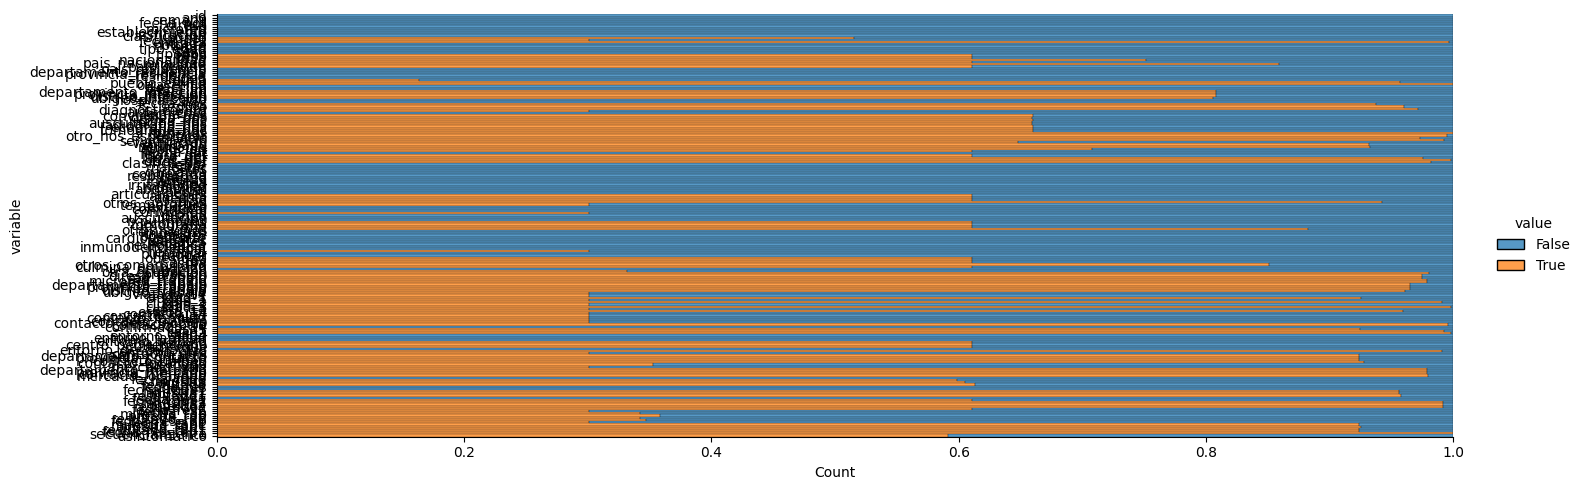

In [ ]:
#Analisamos la proporción de los valores nulos
df.isnull().melt().pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=3
        )
    )
)

<Axes: >

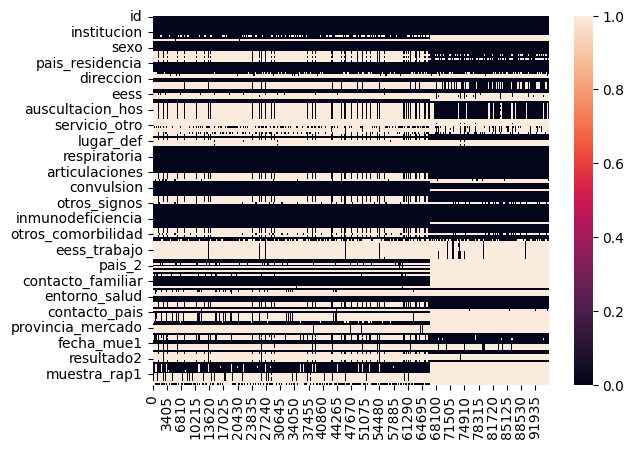

In [ ]:
#Vista de los valores nulos en todo el conjunto de datos
df.isnull().transpose().pipe(
    lambda df: (
        sns.heatmap(
            data=df,
        )
    )
)

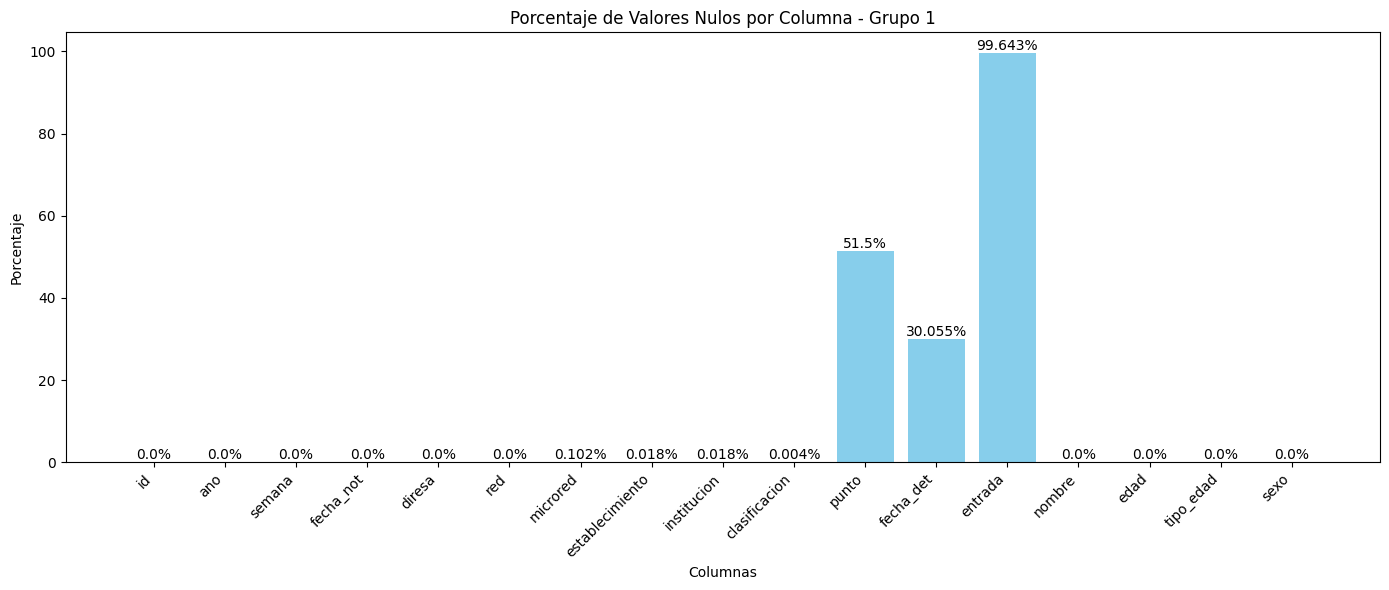

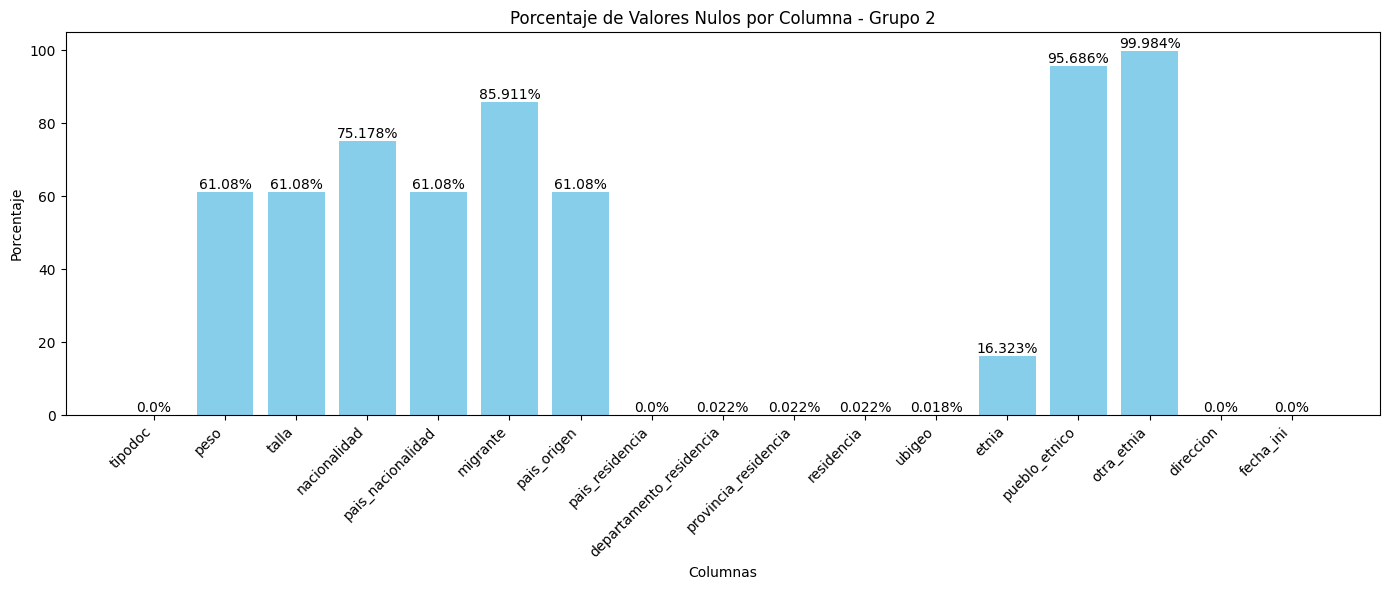

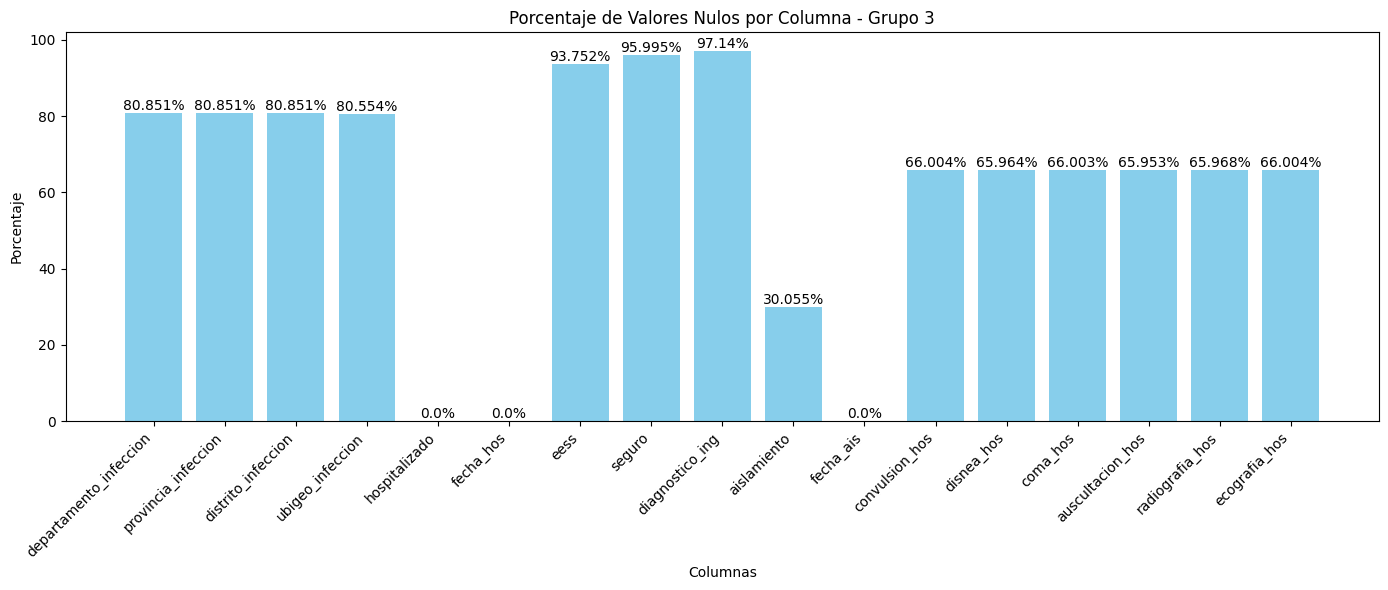

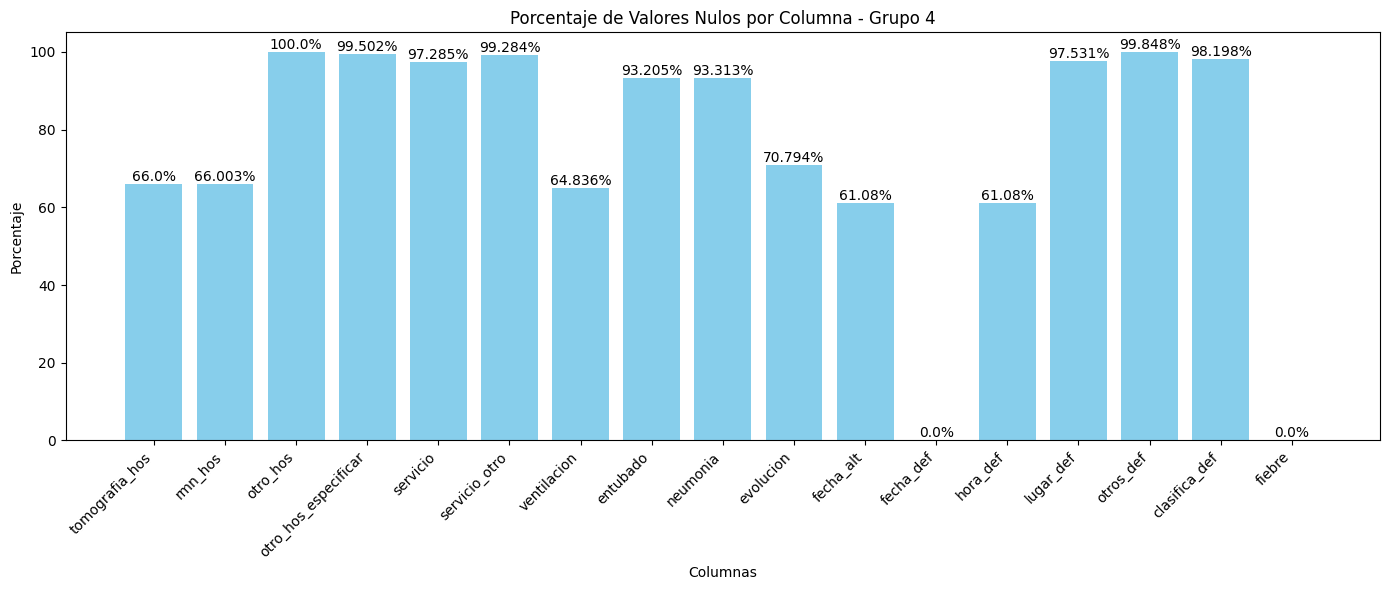

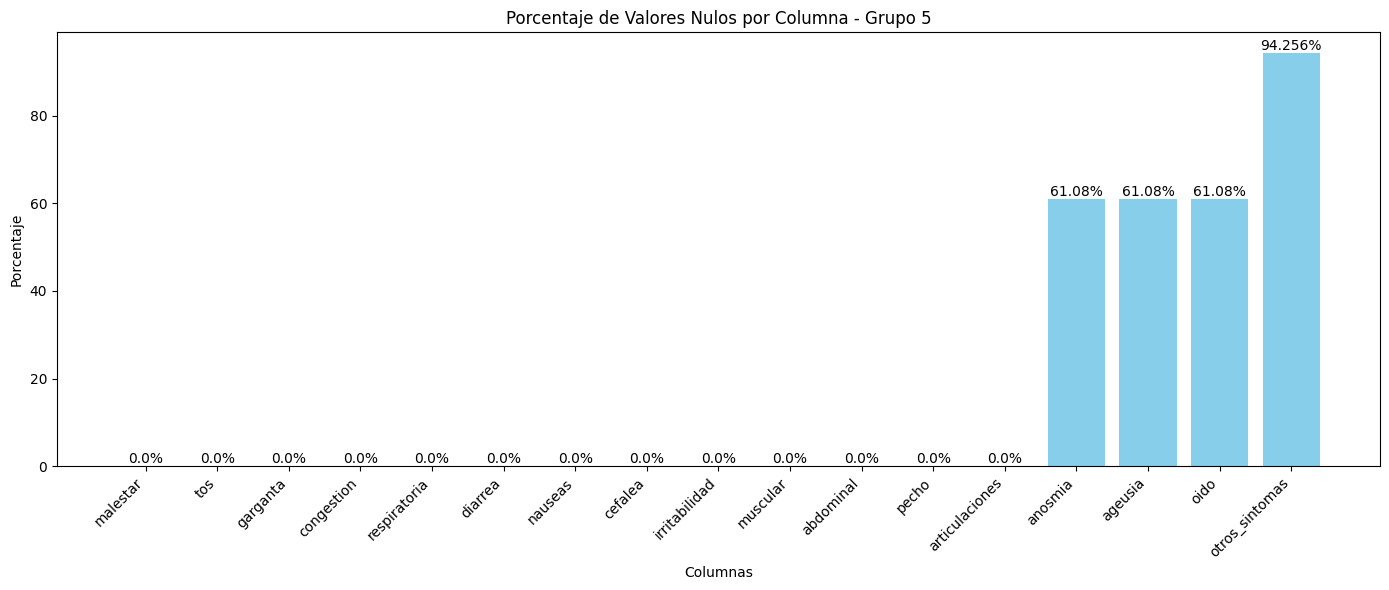

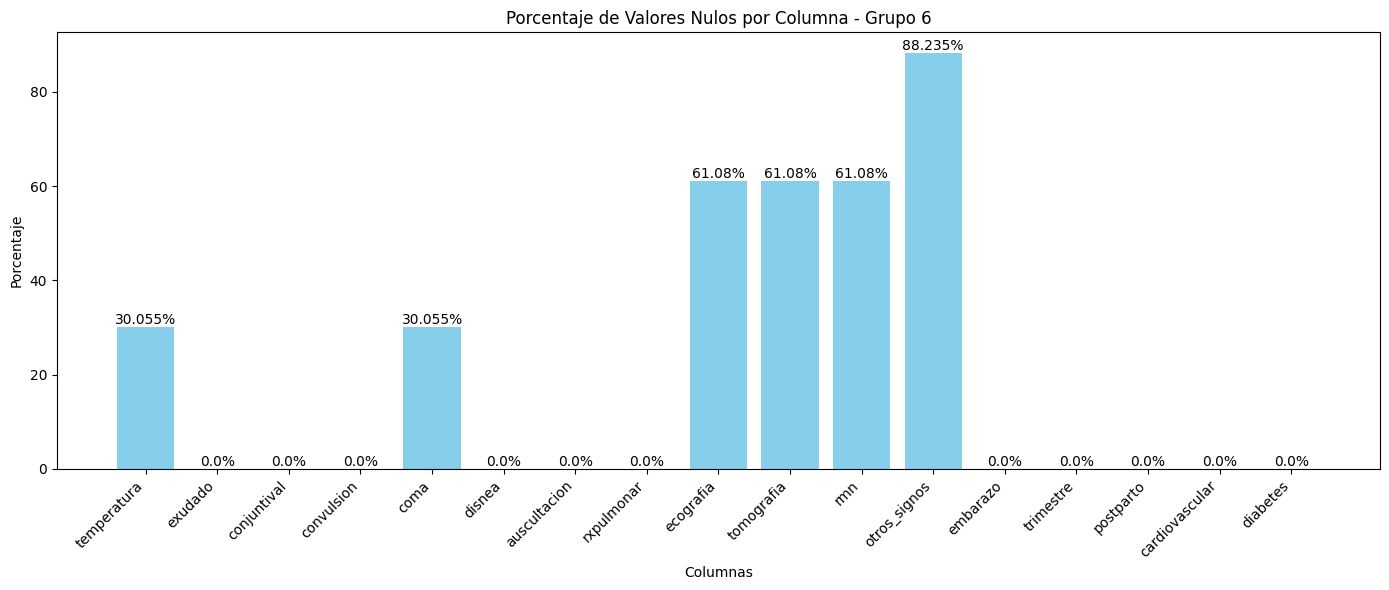

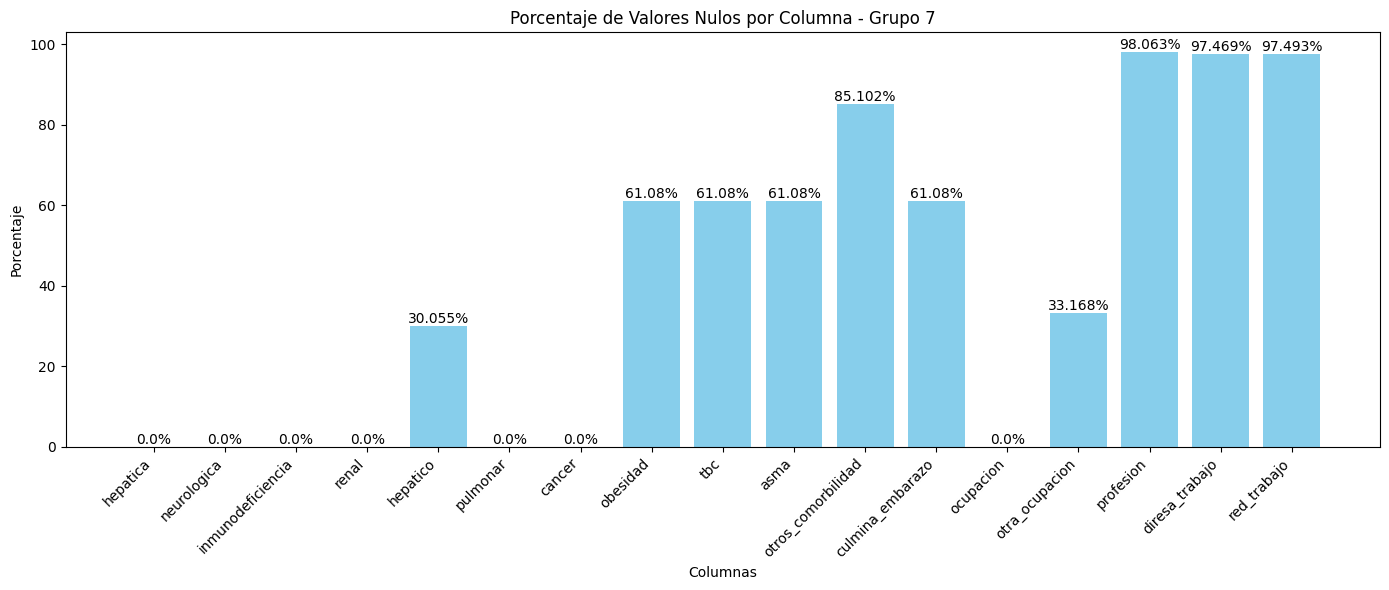

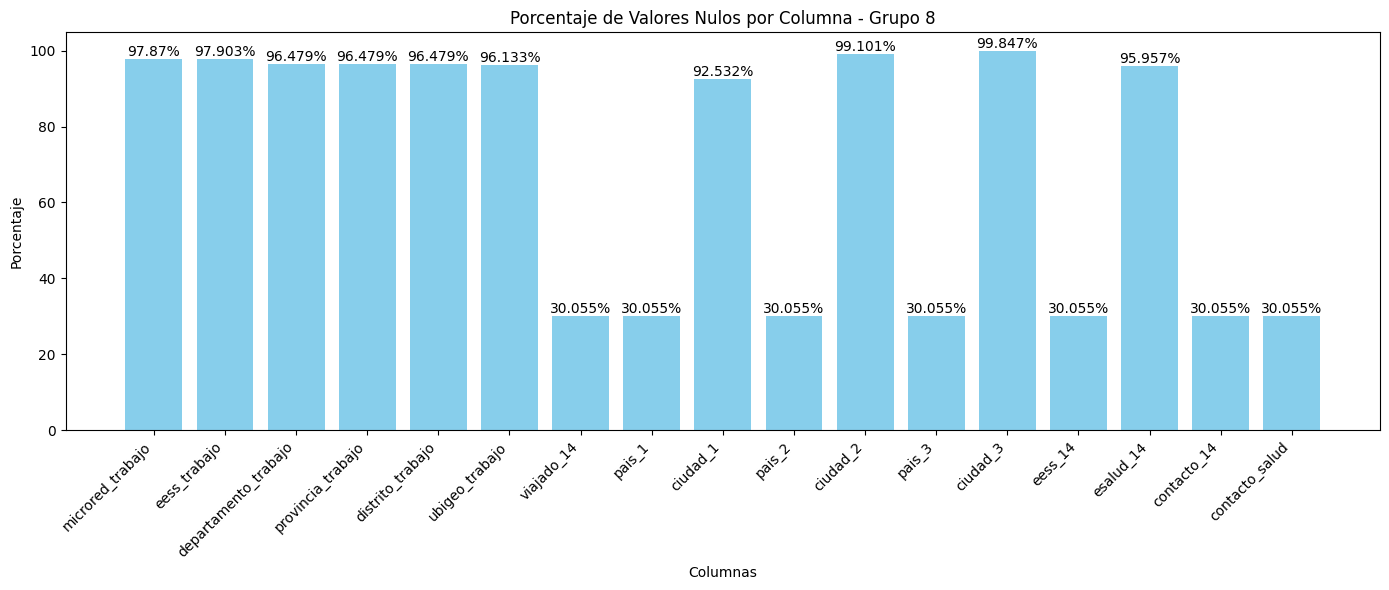

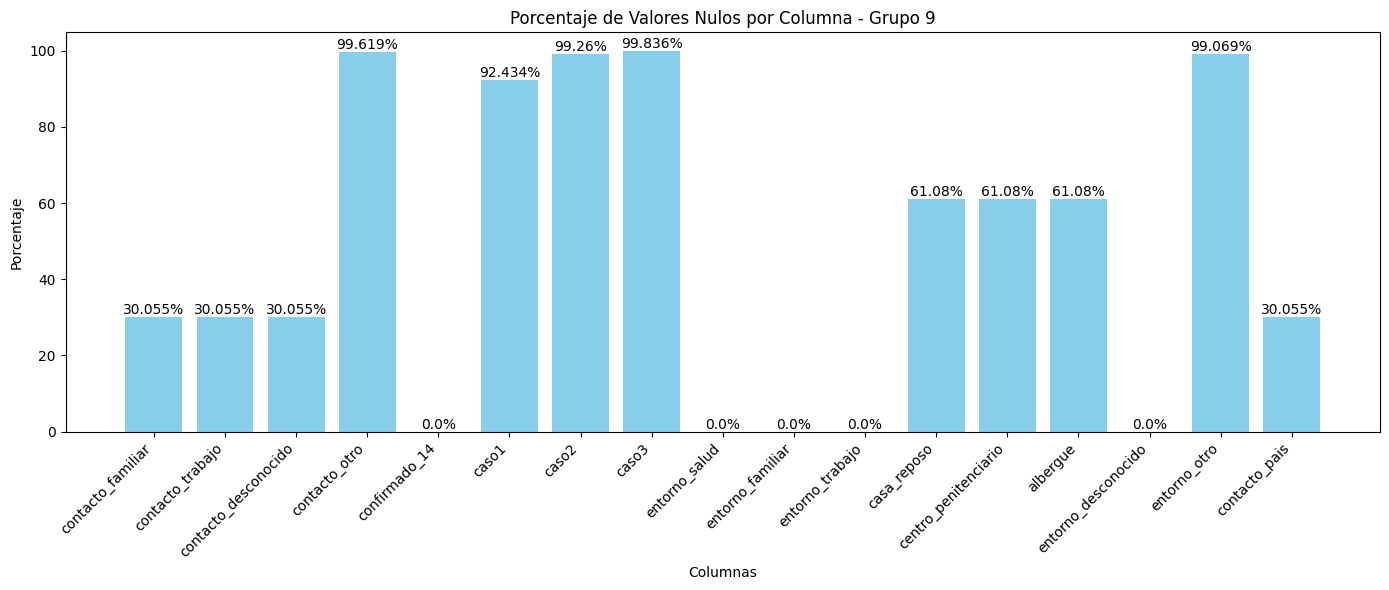

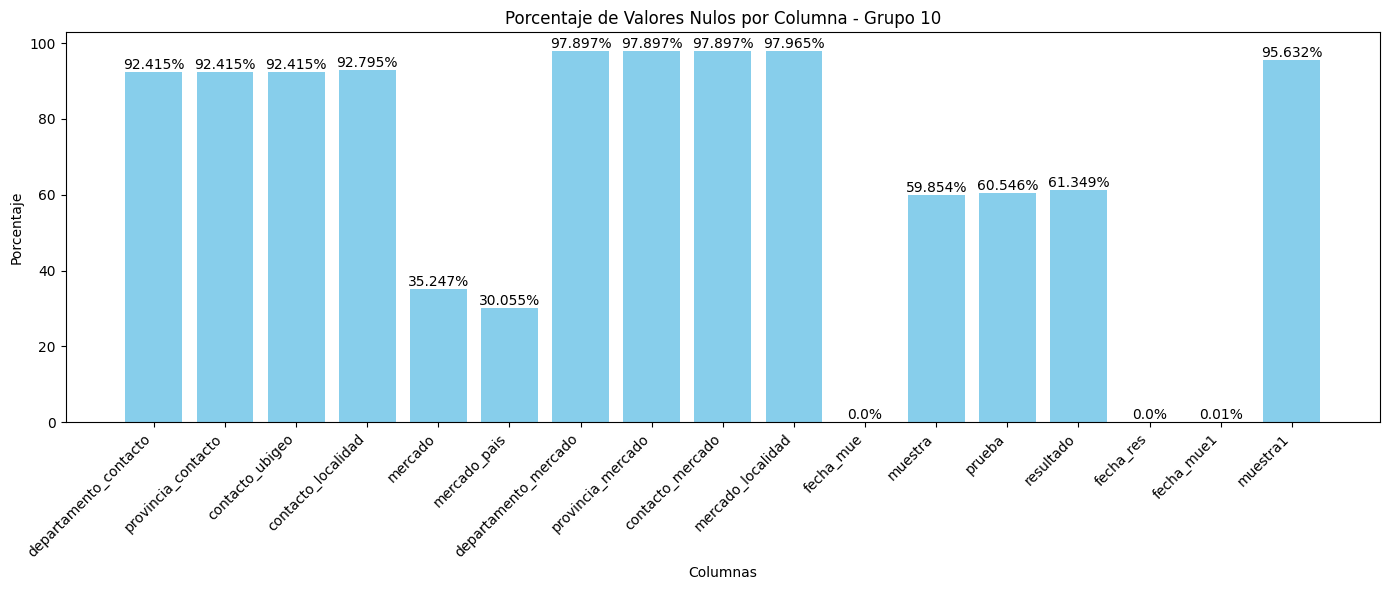

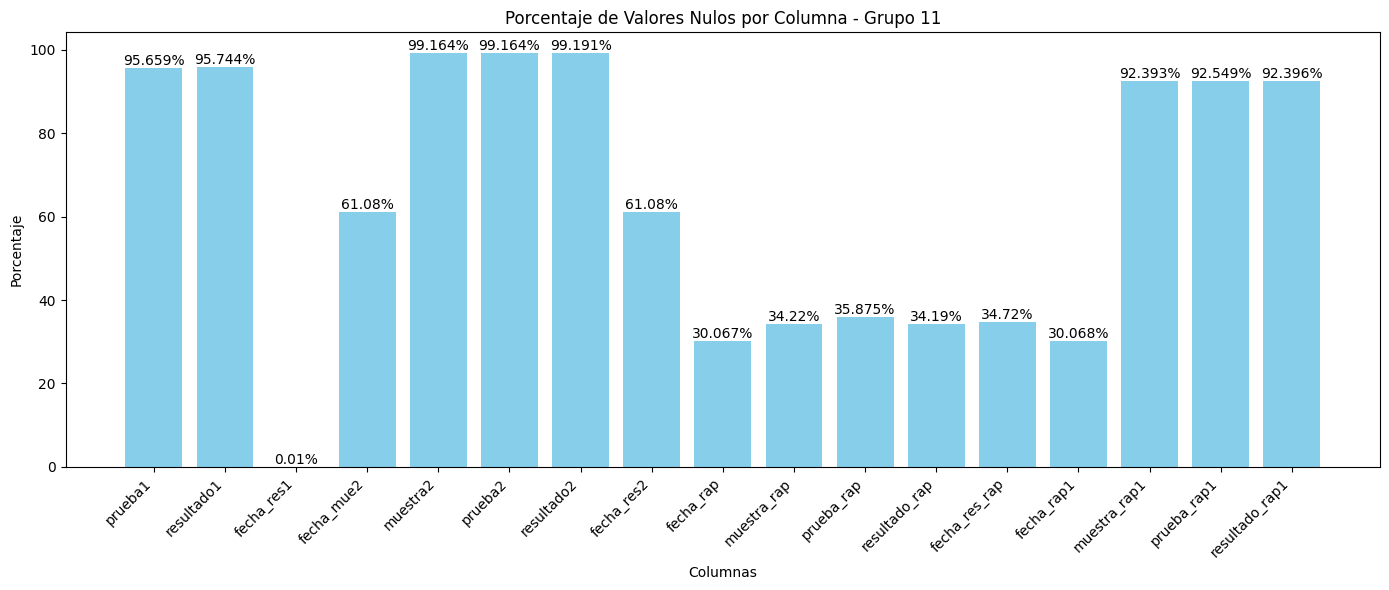

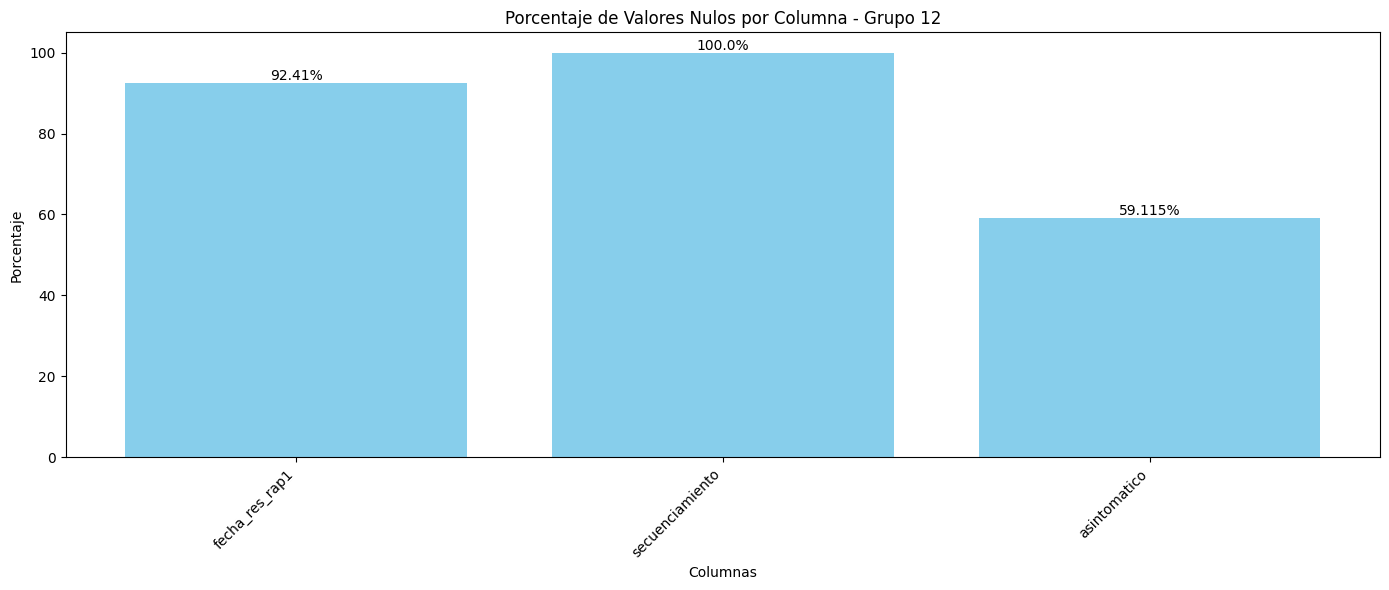

In [ ]:
result_percentage = porcentaje_nulls.round(3)
cantidad_porcentaje = len(result_percentage)
# Dividir los datos en grupos de 17
grupos = [result_percentage[i:i+17] for i in range(0,cantidad_porcentaje, 17)]
cantidad_grupos = enumerate(grupos)
# Crear un gráfico para cada grupo
for i, grupo in cantidad_grupos:
    plt.figure(figsize=(14, 6))
    bars = plt.bar(grupo.index, grupo, color='skyblue')
    plt.title(f'Porcentaje de Valores Nulos por Columna - Grupo {i+1}')
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45, ha='right')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom', fontsize=10, color='black')
    plt.tight_layout()
    plt.show()

In [11]:
#FUNCIÓN PARA VISUALIZAR COLUMNAS CON VALORES DIFERENTES
from matplotlib import pyplot as plt
import seaborn as sns

def imprimir_valores_diferentes(df, val):
    # Agrupar y contar las ocurrencias en la columna val, incluyendo nulos
    counts = df[val].value_counts(dropna=False)

    # Crear un gráfico de barras horizontal utilizando Seaborn y Matplotlib
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))

    # Añadir una columna adicional para representar los valores nulos
    null_count = df[val].isnull().sum()
    if null_count > 0:
        plt.barh('NaN', null_count, color=sns.color_palette("Dark2")[len(counts)])

    # Añadir etiquetas y título
    plt.xlabel('Conteo')
    plt.ylabel(val)
    plt.title(f'Conteo de valores diferentes en la columna {val}')

    # Mostrar el gráfico
    plt.show()


# RELLENAR DATOS

In [12]:
df_test = df.copy()
valores_nulos_test = (df_test.isna().sum() / len(df_test)) * 100
valores_nulos_test

id                   0.000000
ano                  0.000000
semana               0.000000
fecha_not            0.000000
diresa               0.000000
                      ...    
prueba_rap1         92.548917
resultado_rap1      92.395740
fecha_res_rap1      92.410429
secuenciamiento    100.000000
asintomatico        59.114515
Length: 190, dtype: float64

In [13]:
# Define un umbral del 40%
limite = 40
# Filtra las columnas con porcentaje de valores nulos menor al 40% y mayores al 0%
columnas_mantener = valores_nulos_test[(valores_nulos_test > 0) & (valores_nulos_test <= limite)].index
# Crea un nuevo DataFrame con las columnas seleccionadas
df_filtrado = df_test[columnas_mantener]
# Imprime el nuevo DataFrame
valores_nulos_filtrados = (df_filtrado.isna().sum() / len(df_filtrado)) * 100
print(valores_nulos_filtrados.to_string())


microred                    0.101768
establecimiento             0.017836
institucion                 0.017836
clasificacion               0.004197
fecha_det                  30.055081
departamento_residencia     0.022032
provincia_residencia        0.022032
residencia                  0.022032
ubigeo                      0.017836
etnia                      16.322719
aislamiento                30.055081
temperatura                30.055081
coma                       30.055081
hepatico                   30.055081
otra_ocupacion             33.167917
viajado_14                 30.055081
pais_1                     30.055081
pais_2                     30.055081
pais_3                     30.055081
eess_14                    30.055081
contacto_14                30.055081
contacto_salud             30.055081
contacto_familiar          30.055081
contacto_trabajo           30.055081
contacto_desconocido       30.055081
contacto_pais              30.055081
mercado                    35.247338
m

In [14]:
df_filtrado[['microred','establecimiento','institucion','departamento_residencia', 'provincia_residencia', 'residencia', 'ubigeo','clasificacion','etnia']]  # valores categoricos minimos


,microred,establecimiento,institucion,departamento_residencia,provincia_residencia,residencia,ubigeo,clasificacion,etnia
0,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,PUNO,PUNO,PUNO,210101,DESCARTADO,Mestizo
1,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,PUNO,SAN ROMAN,JULIACA,211101,DESCARTADO,NaN
2,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,PUNO,PUNO,PUNO,210101,DESCARTADO,NaN
3,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,PUNO,SAN ROMAN,JULIACA,211101,DESCARTADO,NaN
4,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,PUNO,PUNO,PUNO,210101,CONFIRMADO,NaN
...,...,...,...,...,...,...,...,...,...
95310,ASILLO,C.S. ASILLO,GOBIERNO REGIONAL,PUNO,AZANGARO,ASILLO,210204,CONFIRMADO,Mestizo
95311,SAN ANTÓN,C.S. SAN ANTÓN,GOBIERNO REGIONAL,PUNO,AZANGARO,SAN ANTON,210211,CONFIRMADO,Mestizo
95312,CHUPA,C.S. CHUPA,GOBIERNO REGIONAL,PUNO,AZANGARO,CHUPA,210206,CONFIRMADO,Andino
95313,ALIANZA,C.S. SAN JOSÉ,GOBIERNO REGIONAL,PUNO,AZANGARO,SAN JOSE,210212,CONFIRMADO,Andino


In [15]:
# Supongamos que df_filtrado es tu DataFrame
columnas_categoricas = ['microred','establecimiento','institucion','departamento_residencia', 'provincia_residencia', 'residencia', 'ubigeo','clasificacion','etnia']

#LLENADO CON LA MODA

df_imputado = df_filtrado.copy()
for columna in columnas_categoricas:
    moda_columna = df_imputado[columna].mode().iloc[0]#primer valor de la moda
    df_imputado[columna].fillna(moda_columna, inplace=True)
# Verifica el DataFrame imputado
print(df_imputado.isna().sum().to_string())

microred                       0
establecimiento                0
institucion                    0
clasificacion                  0
fecha_det                  28647
departamento_residencia        0
provincia_residencia           0
residencia                     0
ubigeo                         0
etnia                          0
aislamiento                28647
temperatura                28647
coma                       28647
hepatico                   28647
otra_ocupacion             31614
viajado_14                 28647
pais_1                     28647
pais_2                     28647
pais_3                     28647
eess_14                    28647
contacto_14                28647
contacto_salud             28647
contacto_familiar          28647
contacto_trabajo           28647
contacto_desconocido       28647
contacto_pais              28647
mercado                    33596
mercado_pais               28647
fecha_mue1                    10
fecha_res1                    10
fecha_rap 

<ipython-input-11-b84f83c16160>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))
<ipython-input-11-b84f83c16160>:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))


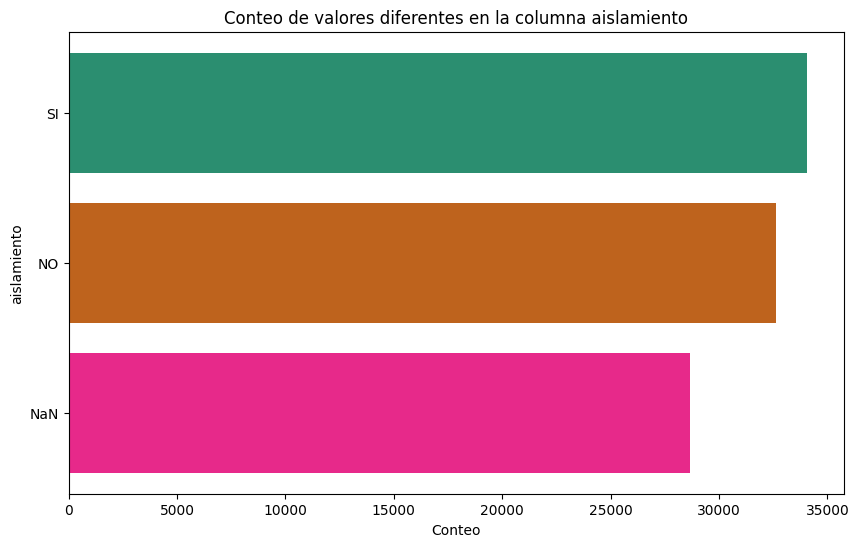

In [16]:
imprimir_valores_diferentes(df_test,'aislamiento')

In [17]:
df_imputado['aislamiento'].fillna('DESCONOCIDO', inplace=True)

<ipython-input-11-b84f83c16160>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))
<ipython-input-11-b84f83c16160>:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))


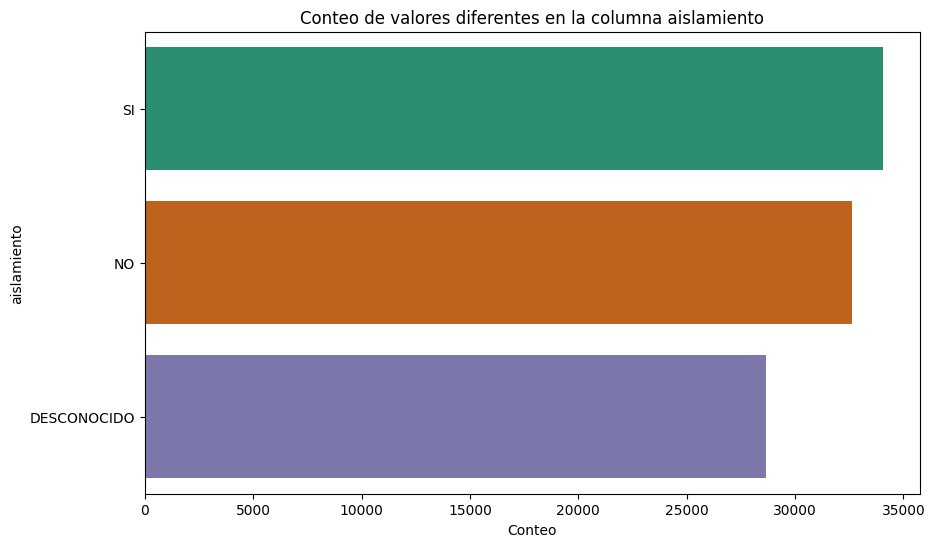

In [18]:
imprimir_valores_diferentes(df_imputado,'aislamiento')

In [21]:
df_test[['ocupacion','otra_ocupacion']]

,ocupacion,otra_ocupacion
0,TRABAJADOR DE SALUD,MEDICO RESIDENTE
1,OTROS,MECANICO
2,OTROS,AMA DE CASA
3,OTROS,SU CASA
4,OTROS,ING. CIVIL
...,...,...
95310,OTROS,AMA DE CASA
95311,OTROS,Ama de casa
95312,OTROS,agricultor
95313,OTROS,AGRICULTOR


In [22]:
df_test[['otra_ocupacion']].isna().sum()

otra_ocupacion    31614
dtype: int64

<ipython-input-11-b84f83c16160>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))
<ipython-input-11-b84f83c16160>:11: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))


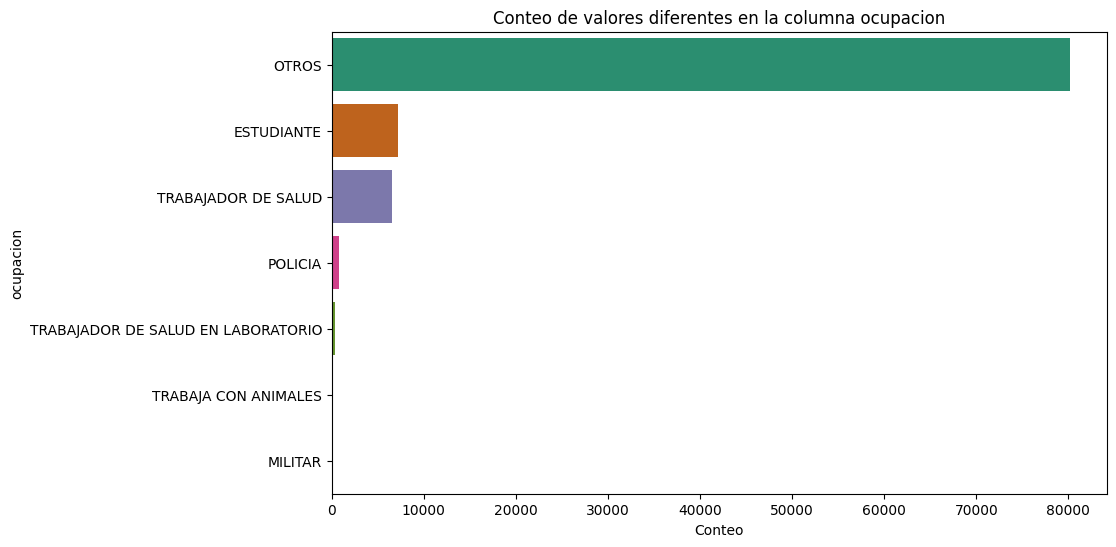

In [24]:
imprimir_valores_diferentes(df_test,'ocupacion')

In [25]:
# Condiciones para asignar valores a 'otra_ocupacion' basándote en 'ocupacion'
condicion_ocupacion_1 = (df_test['ocupacion'] == 'ESTUDIANTE')
condicion_ocupacion_2 = (df_test['ocupacion'] == 'OTROS')
condicion_ocupacion_3 = (df_test['ocupacion'] == 'POLICIA')
condicion_ocupacion_4 = (df_test['ocupacion'] == 'TRABAJA CON ANIMALES')
condicion_ocupacion_5 = (df_test['ocupacion'] == 'TRABAJADOR DE SALUD EN LABORATORIO')
condicion_ocupacion_6 = (df_test['ocupacion'] == 'MILITAR')
condicion_ocupacion_7 = (df_test['ocupacion'] == 'TRABAJADOR DE SALUD')
# Agrega más condiciones según sea necesario

# Diccionario de mapeo para llenar valores nulos en 'otra_ocupacion'
mapeo_otra_ocupacion = {'OTROS': 'NO MENCIONA', 'ESTUDIANTE': 'ESTUDIANTE', 'POLICIA': 'POLICIA','TRABAJA CON ANIMALES':'VETERINARIO','TRABAJADOR DE SALUD EN LABORATORIO':'TRABAJADOR DE SALUD EN LABORATORIO', 'MILITAR':'MILITAR', 'TRABAJADOR DE SALUD':'TRABAJADOR DE SALUD'}

# Aplicar mapeo solo a valores nulos en 'otra_ocupacion'
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_1, 'otra_ocupacion'] = mapeo_otra_ocupacion['ESTUDIANTE']
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_2, 'otra_ocupacion'] = mapeo_otra_ocupacion['OTROS']
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_3, 'otra_ocupacion'] = mapeo_otra_ocupacion['POLICIA']
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_4, 'otra_ocupacion'] = mapeo_otra_ocupacion['TRABAJA CON ANIMALES']
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_5, 'otra_ocupacion'] = mapeo_otra_ocupacion['TRABAJADOR DE SALUD EN LABORATORIO']
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_6, 'otra_ocupacion'] = mapeo_otra_ocupacion['MILITAR']
df_imputado.loc[df_imputado['otra_ocupacion'].isnull() & condicion_ocupacion_7, 'otra_ocupacion'] = mapeo_otra_ocupacion['TRABAJADOR DE SALUD']

In [26]:
print(df_imputado[['otra_ocupacion']].isna().sum())

otra_ocupacion    0
dtype: int64


# **VALORES DE LUGARES VIAJADOS Y OTROS**

In [31]:
#se muestra valores para entender cada columna y sus datos
df_imputado[['viajado_14','pais_1','pais_2','pais_3','eess_14','contacto_14','contacto_pais','mercado','mercado_pais']]

,viajado_14,pais_1,pais_2,pais_3,eess_14,contacto_14,contacto_pais,mercado,mercado_pais
0,SI,Francia,Malta,España,NO,DESCONOCIDO,Sin registro,SI,Italia
1,SI,Italia,Holanda,Sin registro,NO,NO,Italia,NO,Italia
2,SI,Italia,España,Portugal,DESCONOCIDO,DESCONOCIDO,Sin registro,NaN,Sin registro
3,SI,Italia,España,Sin registro,SI,DESCONOCIDO,Sin registro,NO,Sin registro
4,SI,España,Portugal,Italia,NO,NO,Sin registro,NO,Sin registro
...,...,...,...,...,...,...,...,...,...
95310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-11-b84f83c16160>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))
<ipython-input-11-b84f83c16160>:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))


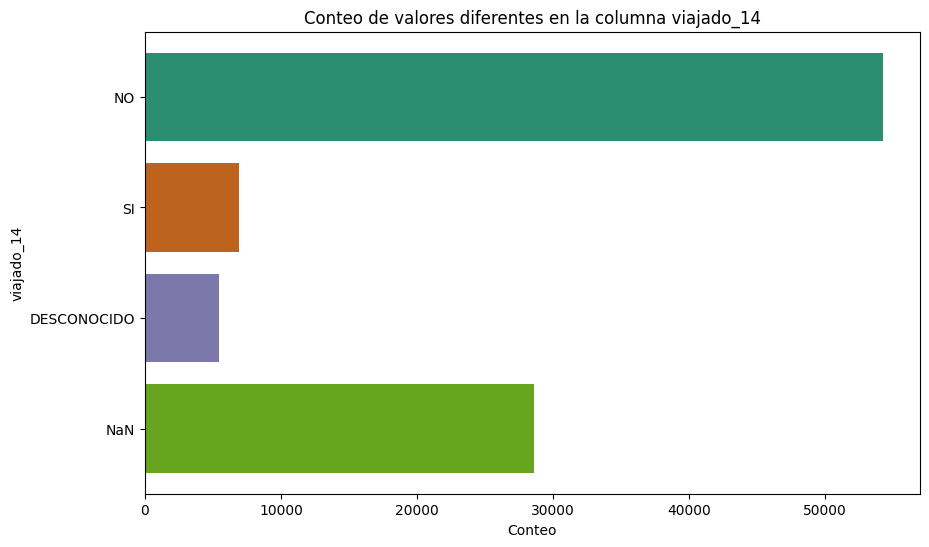

In [32]:
#imprimo mi cantidad de valores diferentes respecto a viajado_14

imprimir_valores_diferentes(df_imputado,'viajado_14')

In [33]:
df_imputado['viajado_14'].fillna('DESCONOCIDO', inplace=True) #inplace asegura que los cambios se apliquen directamente al DataFrame original

<ipython-input-11-b84f83c16160>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))
<ipython-input-11-b84f83c16160>:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.values, y=counts.index, palette=sns.color_palette("Dark2"))


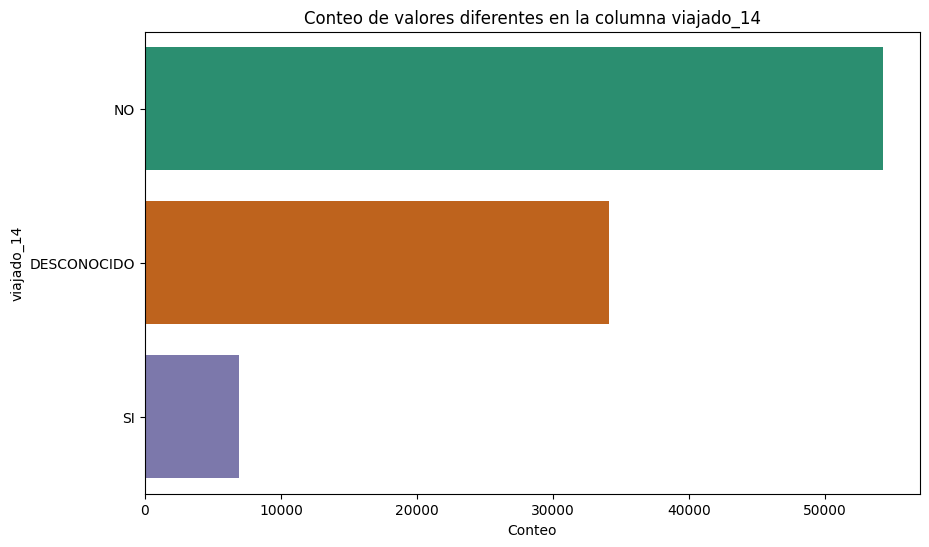

In [34]:
imprimir_valores_diferentes(df_imputado,'viajado_14')

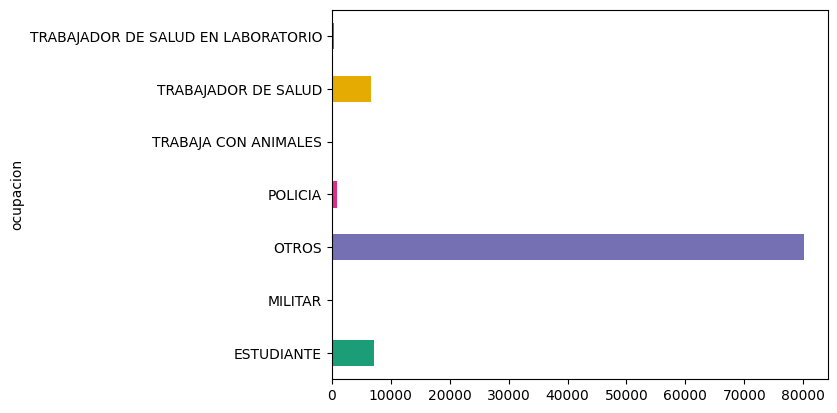

In [ ]:
ocupacion_counts = df_test.groupby('ocupacion').size()
ocupacion_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

In [35]:
#lleno pais_1 en caso de que viajado_14 SEA DESCONOCIDO y sea null, se reemplaza con 'sin registro'
df_imputado['pais_1'] = df_imputado.apply(lambda row: 'sin registro' if row['viajado_14'] == 'DESCONOCIDO' and pd.isnull(row['pais_1']) else row['pais_1'], axis=1)

#lleno pais_2 en caso de que viajado_14 SEA DESCONOCIDO y sea null, se reemplaza con 'sin registro'
df_imputado['pais_2'] = df_imputado.apply(lambda row: 'sin registro' if row['viajado_14'] == 'DESCONOCIDO' and pd.isnull(row['pais_2']) else row['pais_2'], axis=1)

#lleno pais_3 en caso de que viajado_14 SEA DESCONOCIDO y sea null, se reemplaza con 'sin registro'
df_imputado['pais_3'] = df_imputado.apply(lambda row: 'sin registro' if row['viajado_14'] == 'DESCONOCIDO' and pd.isnull(row['pais_3']) else row['pais_3'], axis=1)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#lleno con valores entendibles
df_imputado['fecha_det'].fillna('00-00-0000', inplace=True)
df_imputado['eess_14'].fillna('DESCONOCIDO', inplace=True)
df_imputado['contacto_14'].fillna('DESCONOCIDO', inplace=True)
df_imputado['contacto_pais'].fillna('DESCONOCIDO', inplace=True)
df_imputado['mercado'].fillna('DESCONOCIDO', inplace=True)
df_imputado['mercado_pais'].fillna('sin registro', inplace=True)
df_imputado['fecha_mue1'].fillna('00-00-0000', inplace=True)
df_imputado['fecha_res1'].fillna('00-00-0000', inplace=True)
df_imputado['fecha_rap'].fillna('00-00-0000', inplace=True)
df_imputado['muestra_rap'].fillna('DESCONOCIDO', inplace=True)
df_imputado['prueba_rap'].fillna('DESCONOCIDO', inplace=True)
df_imputado['resultado_rap'].fillna('DESCONOCIDO', inplace=True)
df_imputado['fecha_res_rap'].fillna('00-00-0000', inplace=True)
df_imputado['fecha_rap1'].fillna('00-00-0000', inplace=True)

# **NUMÉRICOS**

In [36]:
#funcion para devolver el tipo de dato y adicionalmente las columnas que aun tienen valores nulos
def verificar_columnas_restantes(df):
    columnas_con_nulos = df.columns[df.isnull().any()]
    df_columnas_con_nulos = df[columnas_con_nulos]
    print(df_columnas_con_nulos.dtypes.to_string())

verificar_columnas_restantes(df_imputado)

temperatura             float64
coma                    float64
hepatico                float64
contacto_salud          float64
contacto_familiar       float64
contacto_trabajo        float64
contacto_desconocido    float64


In [37]:
#verificamos datos
print(df_imputado[['temperatura','coma','hepatico','contacto_salud','contacto_familiar','contacto_trabajo','contacto_desconocido']])

       temperatura  coma  hepatico  contacto_salud  contacto_familiar  \
0             37.0   0.0       0.0             0.0                0.0   
1             38.0   0.0       0.0             0.0                0.0   
2             37.0   0.0       0.0             0.0                0.0   
3             37.0   0.0       0.0             0.0                0.0   
4             37.0   0.0       0.0             0.0                0.0   
...            ...   ...       ...             ...                ...   
95310          NaN   NaN       NaN             NaN                NaN   
95311          NaN   NaN       NaN             NaN                NaN   
95312          NaN   NaN       NaN             NaN                NaN   
95313          NaN   NaN       NaN             NaN                NaN   
95314          NaN   NaN       NaN             NaN                NaN   

       contacto_trabajo  contacto_desconocido  
0                   0.0                   0.0  
1                   0.0    

In [38]:
#verificamos la cantidad de nulos de las columnas listadas
print(df_imputado[['temperatura','coma','hepatico','contacto_salud','contacto_familiar','contacto_trabajo','contacto_desconocido']].isna().sum().to_string())

temperatura             28647
coma                    28647
hepatico                28647
contacto_salud          28647
contacto_familiar       28647
contacto_trabajo        28647
contacto_desconocido    28647


In [39]:
# Llenamos las columnas numericas con la MEDIANA

columnas_numericas = ['temperatura','coma','hepatico','contacto_salud','contacto_familiar','contacto_trabajo','contacto_desconocido']

for columna in columnas_numericas:
    mediana_columna = df_imputado[columna].median()
    df_imputado[columna].fillna(mediana_columna, inplace=True)

In [41]:
#se verifica que ya no tienen valores nulos
print(df_imputado[['temperatura','coma','hepatico','contacto_salud','contacto_familiar','contacto_trabajo','contacto_desconocido']].isna().sum().to_string())

print("\n\n\nColumnas con valores nullos restantes: ",verificar_columnas_restantes(df_imputado))

temperatura             0
coma                    0
hepatico                0
contacto_salud          0
contacto_familiar       0
contacto_trabajo        0
contacto_desconocido    0
Series([], )



Columnas con valores nullos restantes:  None


In [42]:
resultados_concatenados = pd.concat([df_filtrado.isna().sum(), df_imputado.isna().sum()], axis=1)
resultados_concatenados.columns = ['Nulos en data al Inicio', 'Nulos al FINAL']
print(resultados_concatenados)

                         Nulos en data al Inicio  Nulos al FINAL
microred                                      97               0
establecimiento                               17               0
institucion                                   17               0
clasificacion                                  4               0
fecha_det                                  28647               0
departamento_residencia                       21               0
provincia_residencia                          21               0
residencia                                    21               0
ubigeo                                        17               0
etnia                                      15558               0
aislamiento                                28647               0
temperatura                                28647               0
coma                                       28647               0
hepatico                                   28647               0
otra_ocupacion           